# Import Libraries and Necessary Installation

In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
import time
plt.style.use(style="seaborn")
%matplotlib inline

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb

In [6]:
os.getcwd()

'C:\\Users\\13158\\OneDrive - softytechss\\NJIT\\Books\\1st Sem\\Data Analytics for Information System'

In [7]:
#Change directory if necessary
os.chdir('/Users/13158')

In [8]:
os.getcwd()

'C:\\Users\\13158'

# Read File

In [9]:
%%time

train_id = pd.read_csv("train_identity.csv")
train_tr = pd.read_csv("train_transaction.csv")

Wall time: 13.9 s


In [10]:
train_tr

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_id

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


#Check Memory Usage

In [12]:
print(train_id.info())
print(train_tr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

# Merge Files

#Merge Transaction and Identity datasets

In [13]:
df = pd.merge(
    train_tr,
    train_id,
    how="left"
)

In [14]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

#Show Shape of Dataset

In [15]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (590540, 434)


#Feature Size

In [16]:
Feature_Size = len(df.columns)
print("Feature_Size for Data =", Feature_Size)


Feature_Size for Data = 434


#Show Statistics for Dataset

In [17]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


#Show Percentage of Fraud vs Normal Transactions in the Dataset

In [18]:
Total_transactions_data = len(df)
normal_data = len(df[df.isFraud == 0])
fraudulent_data = len(df[df.isFraud == 1])
fraud_percentage_data = round(fraudulent_data/Total_transactions_data*100, 2)
normal_percentage_data = round(normal_data/Total_transactions_data*100, 2)
print('Total number of Transactions in the dataset are {}'.format(Total_transactions_data))
print('Number of Normal Transactions in the dataset are {}'.format(normal_data))
print('Number of fraudulent Transactions in the dataset are {}'.format(fraudulent_data))
print('Percentage of Fraud Transactions in the dataset is {}'.format(fraud_percentage_data))
print('Percentage of Normal(Non-Fraud) transactions in the dataset:',format(normal_percentage_data))

Total number of Transactions in the dataset are 590540
Number of Normal Transactions in the dataset are 569877
Number of fraudulent Transactions in the dataset are 20663
Percentage of Fraud Transactions in the dataset is 3.5
Percentage of Normal(Non-Fraud) transactions in the dataset: 96.5


#Statistics for Normal transactions in the Dataset

In [19]:
nonfraud_cases = df[df.isFraud == 0]
nonfraud_cases.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.698770e+05,569877.0,5.698770e+05,569877.000000,569877.000000,561367.000000,568351.000000,565828.000000,511912.000000,511912.000000,...,128323.000000,41378.000000,128280.000000,128230.000000,4733.00000,4743.000000,4345.000000,4715.000000,4738.000000,74135.000000
mean,3.281810e+06,0.0,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,...,188.113697,14.213882,354.854950,401.133705,364.47940,15.757959,12.802301,328.622269,148.112917,26.452391
std,1.707548e+05,0.0,4.623930e+06,239.395078,4905.672370,157.726065,10.904432,41.046975,101.692564,2.607742,...,30.049242,1.571254,142.178953,152.826127,194.17561,6.495174,2.306966,96.886569,31.961300,3.707417
min,2.987000e+06,0.0,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.000000,10.000000,100.000000,100.000000,100.00000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.133317e+06,0.0,3.010651e+06,43.970000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.00000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.281808e+06,0.0,7.271678e+06,68.500000,9711.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,469.000000,252.00000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429974e+06,0.0,1.125334e+07,120.000000,14229.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,469.00000,14.000000,15.000000,360.000000,169.000000,32.000000
max,3.577539e+06,0.0,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.00000,44.000000,26.000000,548.000000,216.000000,32.000000


#Statistics for Fraud Transactions in Dataset

In [20]:
fraud_cases = df[df.isFraud == 1]
fraud_cases.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,2.066300e+04,20663.0,2.066300e+04,20663.000000,20663.000000,20240.000000,20624.000000,20453.000000,12922.000000,12922.000000,...,11046.000000,3735.000000,11038.000000,11031.000000,426.000000,426.000000,402.000000,417.000000,425.000000,3451.000000
mean,3.294952e+06,1.0,7.690033e+06,149.244779,9547.654164,365.370850,162.368648,191.994328,294.317134,86.286024,...,204.991400,14.497189,333.060156,435.838002,410.382629,18.727700,12.786070,340.764988,159.743529,27.716024
std,1.620403e+05,0.0,4.416551e+06,232.212163,4762.051380,159.623511,17.495775,45.779886,103.584955,4.936238,...,29.822542,1.420988,126.113487,140.303630,241.117197,9.986157,2.993593,103.203530,31.768511,4.154470
min,2.987203e+06,1.0,8.976000e+04,0.292000,1015.000000,100.000000,100.000000,100.000000,110.000000,10.000000,...,100.000000,11.000000,100.000000,100.000000,142.000000,14.000000,11.000000,104.000000,100.000000,0.000000
25%,3.167366e+06,1.0,3.965858e+06,35.044000,5732.500000,204.000000,150.000000,138.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,325.000000,252.000000,14.000000,11.000000,321.000000,142.000000,24.000000
50%,3.291934e+06,1.0,7.575230e+06,75.000000,9633.000000,375.000000,150.000000,224.000000,299.000000,87.000000,...,225.000000,15.000000,290.000000,507.000000,252.000000,14.000000,11.000000,321.000000,161.000000,24.000000
75%,3.428646e+06,1.0,1.121743e+07,161.000000,13623.000000,514.000000,185.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,417.000000,549.000000,657.000000,14.000000,15.000000,438.000000,184.000000,32.000000
max,3.577526e+06,1.0,1.581088e+07,5191.000000,18375.000000,600.000000,231.000000,237.000000,536.000000,96.000000,...,226.000000,29.000000,667.000000,657.000000,854.000000,42.000000,26.000000,539.000000,216.000000,32.000000


In [21]:
display(df.dtypes.value_counts())

float64    399
object      31
int64        4
dtype: int64

#Show Numerical and Categorical Variables

In [22]:
numerical_var = df.columns[df.dtypes != 'object']
categorical_var = df.columns[df.dtypes == object]

print(numerical_var)
print(categorical_var)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=403)
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


#Check for Duplicates

In [23]:
df.duplicated().sum()

0

#Correlation

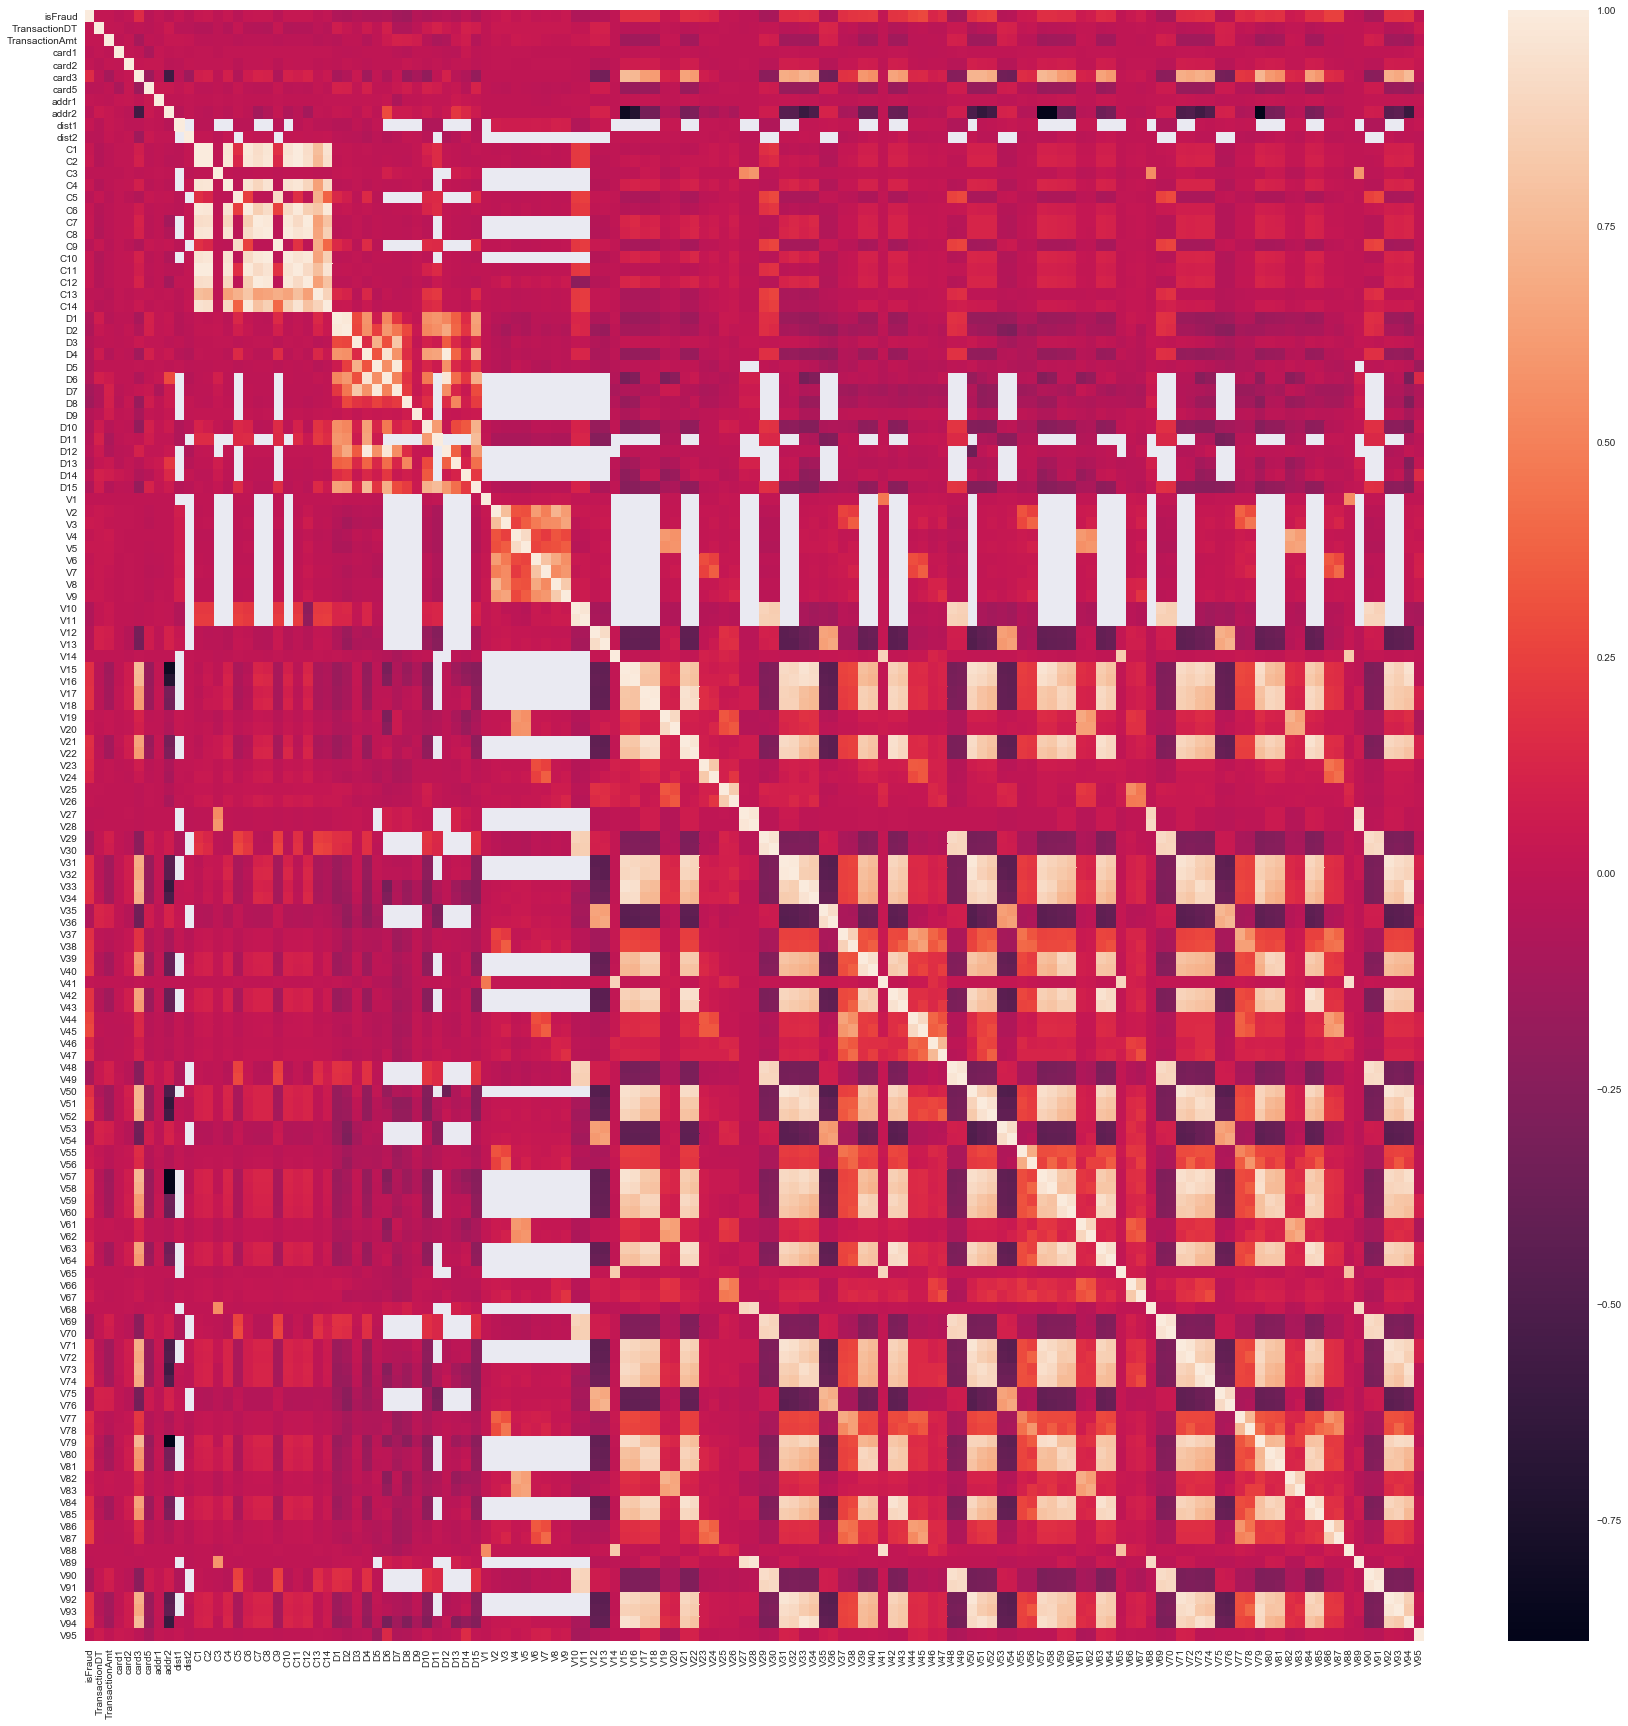

In [24]:
df_sliced = df.iloc[:,1:150]
df_sliced
plt.subplots(figsize=(30,30))
corr = df_sliced.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#V1 to V11 has high correlation with D6 to D14 as well as with other V attributes

In [25]:
# the C* attributes are more correlated within themselves with respect to D* attributes internal correlation.
#Also C* attributes are not much correlated with D* attributes.

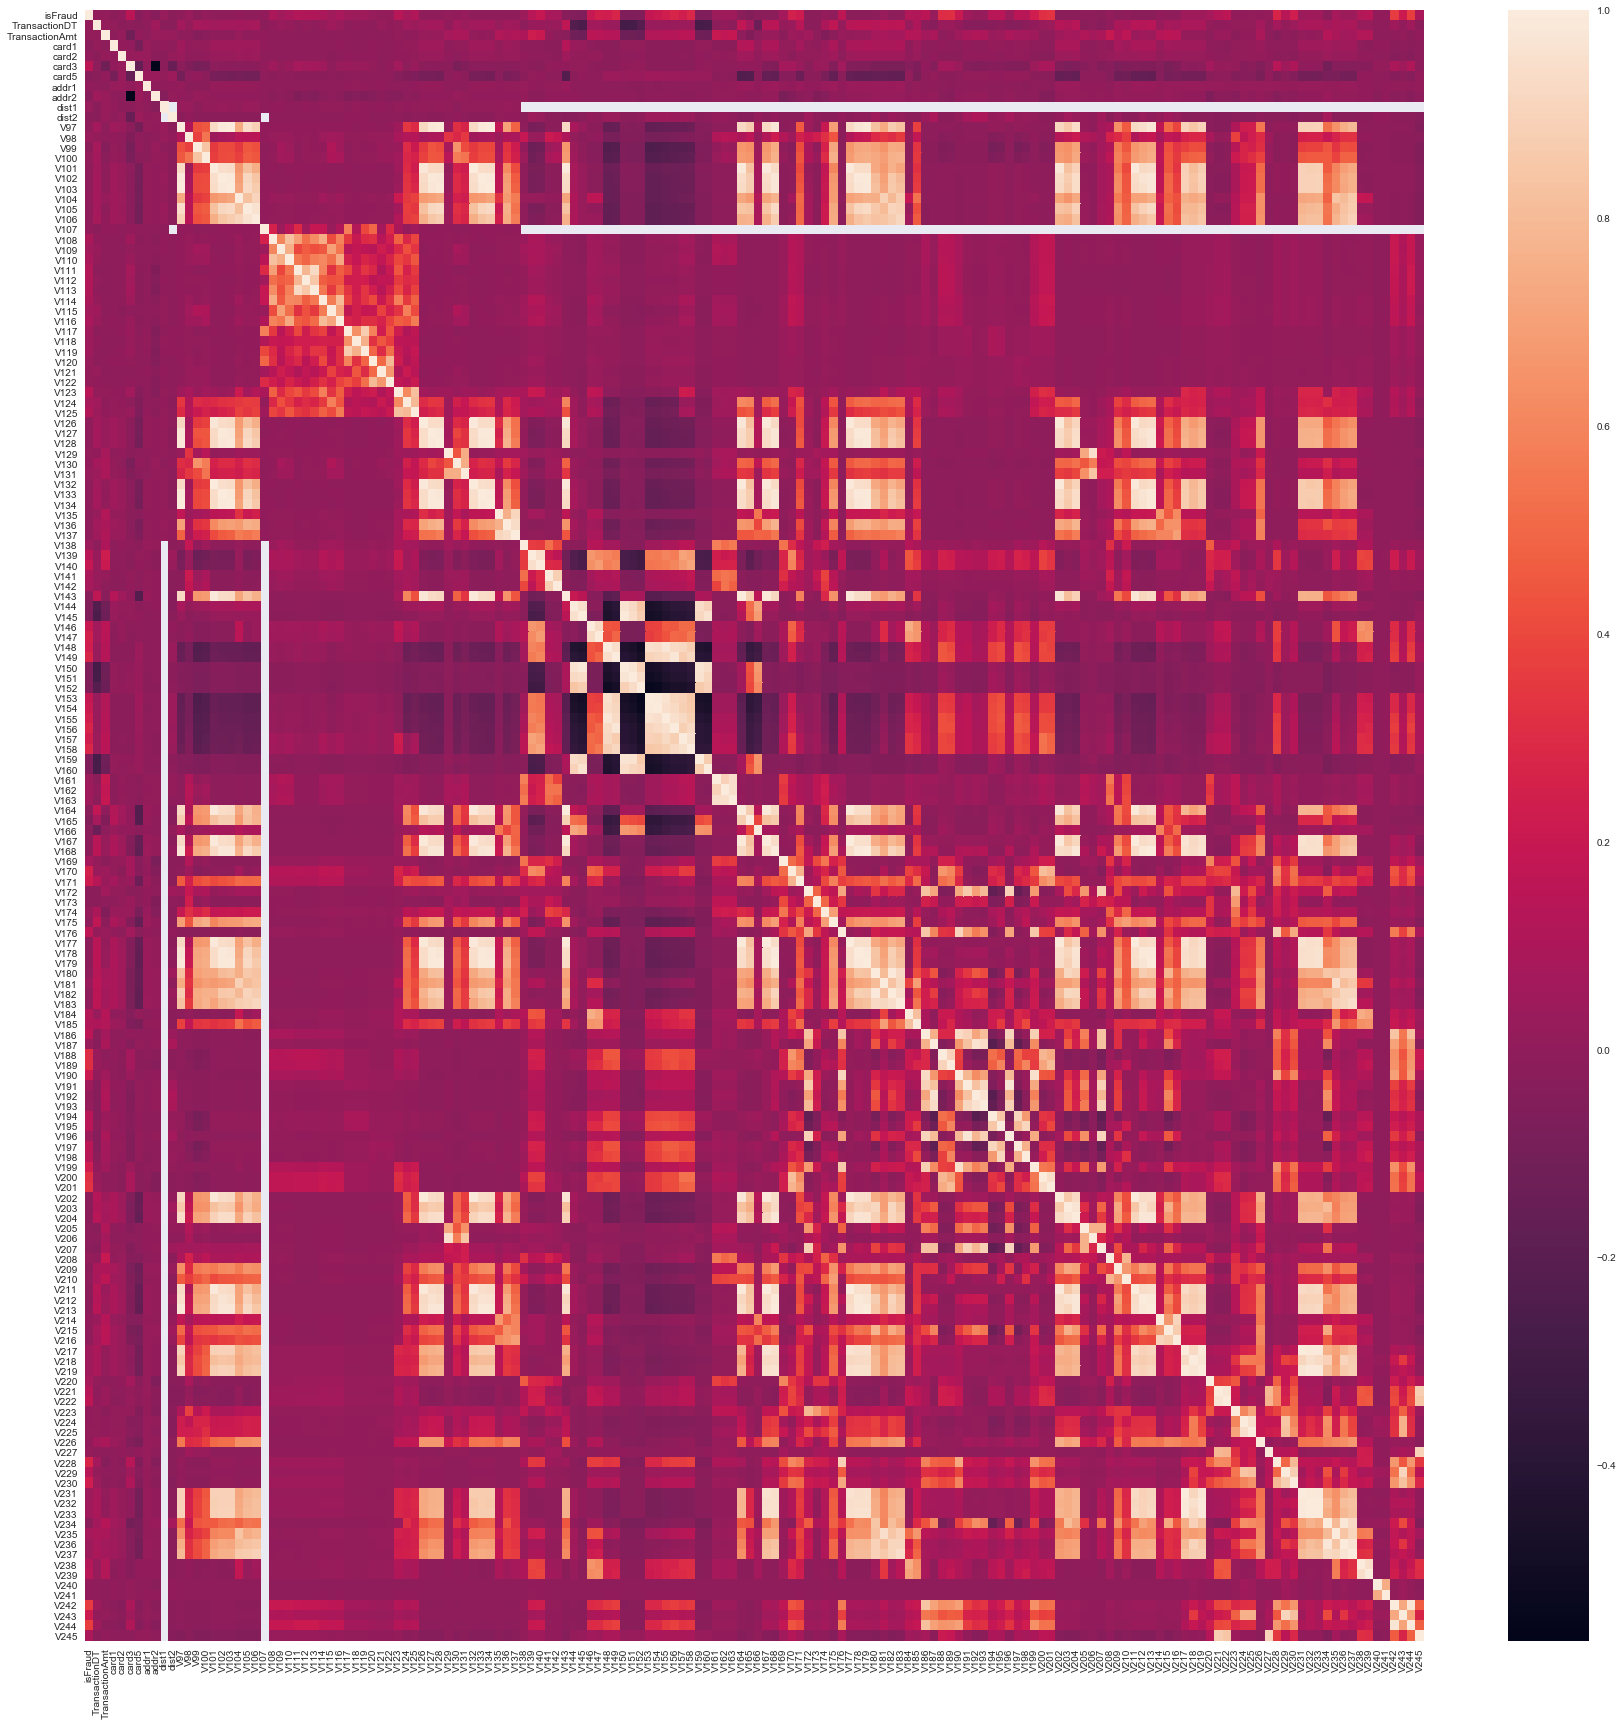

In [26]:
df_sliced_1 = pd.concat([df.iloc[:,1:16],df.iloc[:,151:300]], axis=1)
plt.subplots(figsize=(30,30))
corr = df_sliced_1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# V107 is highly correlated with most of the other V* attributes


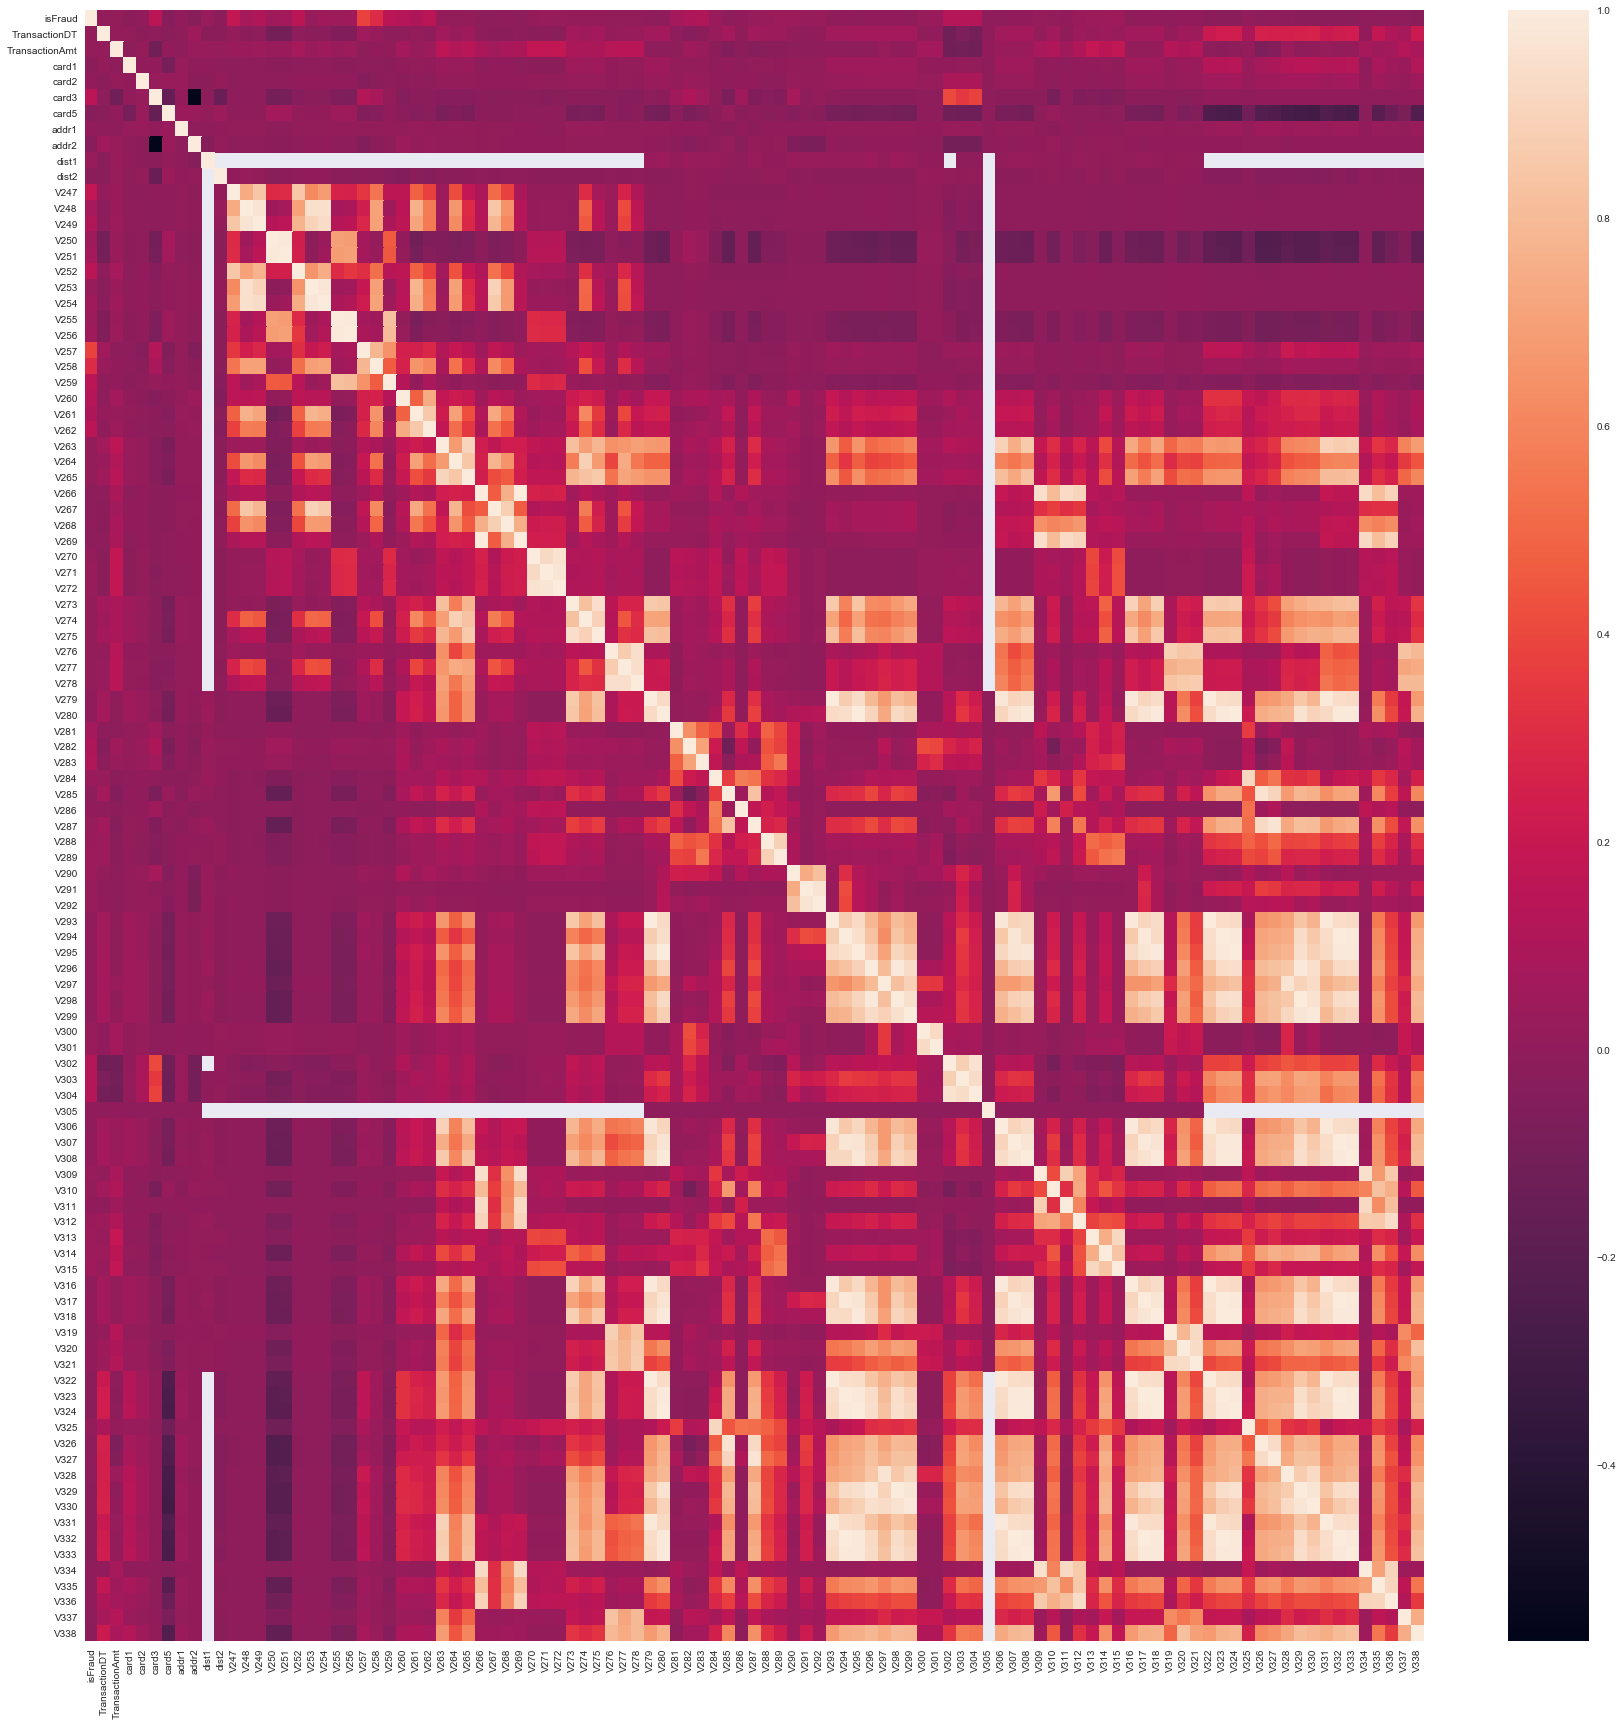

In [27]:
df_sliced_1 = pd.concat([df.iloc[:,1:16],df.iloc[:,301:393]], axis=1)
plt.subplots(figsize=(30,30))
corr = df_sliced_1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# dst1 is highly correlated with a large number of V* columns

#Histogram for isFraud record counts

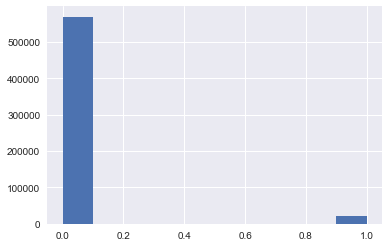

In [28]:
#Dataset isFraud Check
df.isFraud.hist()

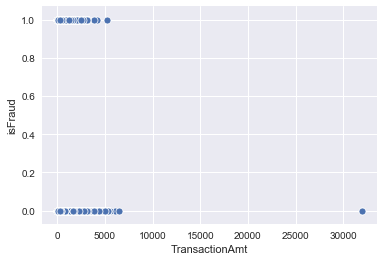

In [29]:
sns.scatterplot(x="TransactionAmt", y="isFraud",data=df)

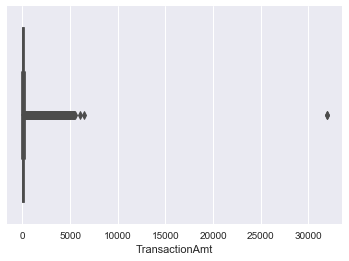

In [30]:
sns.boxplot(x=df['TransactionAmt'])

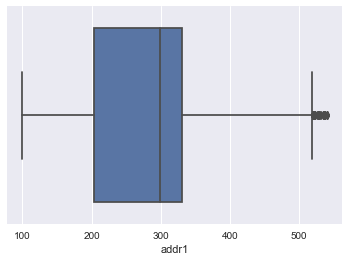

In [31]:
sns.boxplot(x=df['addr1'])

# Feature Engineering

#Check and handle Null values

In [32]:
df.isnull().values.any()

True

In [33]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           581607 non-null  float64
 7   card3           588975 non-null  float64
 8   card4           588963 non-null  object 
 9   card5           586281 non-null  float64
 10  card6           588969 non-null  object 
 11  addr1           524834 non-null  float64
 12  addr2           524834 non-null  float64
 13  dist1           238269 non-null  float64
 14  dist2           37627 non-null   float64
 15  P_emaildomain   496084 non-null  object 
 16  R_emaildomain   137291 non-null  object 
 17  C1       

#Fill NaN values with zero. As there are many columns having Null value, droping the columns with Null values will delete a lot of data.

In [34]:
df.fillna(0, inplace = True)
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,0.0,150.0,discover,142.0,...,0,0.0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0,0.0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0,0.0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,0,0.0,0,0,0,0,0,0,0,0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,0.0,150.0,visa,226.0,...,0,0.0,0,0,0,0,0,0,0,0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0,0.0,0,0,0,0,0,0,0,0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0,0.0,0,0,0,0,0,0,0,0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,0,0.0,0,0,0,0,0,0,0,0


#Check for Null values after replacement

In [35]:
df.isnull().values.any()

False

#Label Encoding to convert categorical variables into numerical variables

In [36]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [37]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,4,13926,0.0,150.0,2,142.0,...,0,0.0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.00,4,2755,404.0,150.0,3,102.0,...,0,0.0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.00,4,4663,490.0,150.0,4,166.0,...,0,0.0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.00,4,18132,567.0,150.0,3,117.0,...,0,0.0,0,0,0,0,0,0,0,0
4,2987004,0,86506,50.00,1,4497,514.0,150.0,3,102.0,...,124,32.0,165,4,2,1,2,2,2,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,4,6550,0.0,150.0,4,226.0,...,0,0.0,0,0,0,0,0,0,0,0
590536,3577536,0,15811049,39.50,4,10444,225.0,150.0,3,224.0,...,0,0.0,0,0,0,0,0,0,0,0
590537,3577537,0,15811079,30.95,4,12037,595.0,150.0,3,224.0,...,0,0.0,0,0,0,0,0,0,0,0
590538,3577538,0,15811088,117.00,4,7826,481.0,150.0,3,224.0,...,0,0.0,0,0,0,0,0,0,0,0


In [38]:
#Check for categorical variables

categorical_var_df_1 = df.columns[df.dtypes == object]
print(categorical_var_df_1)


Index([], dtype='object')


#Check for any negative values

In [39]:
(df < 0).values.any()

True

#Total Number of negative values

In [40]:
np.sum((df < 0).values.ravel())

263996

#Replace the negative values with zero

In [41]:
df[df < 0] = 0

#Check so that negative values don't exist

In [42]:
np.sum((df < 0).values.ravel())

0

# Feature Selection

#Find the related scores of the features in Train Dataset

In [43]:
Y_data = df.iloc[:,1]
Y_data

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [44]:
df_input=df.drop(columns='isFraud')
df_input

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,4,13926,0.0,150.0,2,142.0,2,...,0,0.0,0,0,0,0,0,0,0,0
1,2987001,86401,29.00,4,2755,404.0,150.0,3,102.0,2,...,0,0.0,0,0,0,0,0,0,0,0
2,2987002,86469,59.00,4,4663,490.0,150.0,4,166.0,3,...,0,0.0,0,0,0,0,0,0,0,0
3,2987003,86499,50.00,4,18132,567.0,150.0,3,117.0,3,...,0,0.0,0,0,0,0,0,0,0,0
4,2987004,86506,50.00,1,4497,514.0,150.0,3,102.0,2,...,124,32.0,165,4,2,1,2,2,2,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,4,6550,0.0,150.0,4,226.0,3,...,0,0.0,0,0,0,0,0,0,0,0
590536,3577536,15811049,39.50,4,10444,225.0,150.0,3,224.0,3,...,0,0.0,0,0,0,0,0,0,0,0
590537,3577537,15811079,30.95,4,12037,595.0,150.0,3,224.0,3,...,0,0.0,0,0,0,0,0,0,0,0
590538,3577538,15811088,117.00,4,7826,481.0,150.0,3,224.0,3,...,0,0.0,0,0,0,0,0,0,0,0


In [45]:
bestfeatures = SelectKBest(score_func=chi2, k=150)
fit = bestfeatures.fit(df_input,Y_data)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_input.columns)
print(dfscores)
print(dfcolumns)

                0
0    1.049236e+06
1    2.931918e+08
2    3.205480e+04
3    9.111855e+03
4    2.666216e+05
..            ...
428  7.924305e+03
429  1.592105e+04
430  8.963922e+03
431  1.505716e+04
432  6.035397e+06

[433 rows x 1 columns]
                  0
0     TransactionID
1     TransactionDT
2    TransactionAmt
3         ProductCD
4             card1
..              ...
428           id_36
429           id_37
430           id_38
431      DeviceType
432      DeviceInfo

[433 rows x 1 columns]


In [46]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
Features = featureScores.sort_values('Score', ascending=False)
Selected_features= Features['Specs'].to_numpy()
Selected_features= Selected_features[:150]
df_selected_features=df_input[Selected_features]
df.iloc[:,1]
df_selected_features_io = df_selected_features.join(df.iloc[:,1])
df_selected_features_io

,id_02,TransactionDT,V160,DeviceInfo,V159,V165,id_20,V265,V264,V274,...,id_33,V39,V324,V81,V51,V143,V185,V220,id_05,isFraud
0,0.0,86400,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,86401,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,86469,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,86499,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,70787.0,86506,169690.796875,955,15557.990234,5155.0,144.0,0.0,0.0,0.0,...,165,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,15811047,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
590536,0.0,15811049,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
590537,0.0,15811079,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
590538,0.0,15811088,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Splitting dataset into train and test dataset

In [47]:
X_train, X_test = train_test_split(df_selected_features_io, test_size=0.20, random_state=42)

#Set target variable for Dataset

In [48]:
Y_train = X_train.loc[:,'isFraud']
Y_train

5307      0
191582    0
260168    0
18516     0
47538     0
         ..
110268    0
259178    0
365838    0
131932    0
121958    1
Name: isFraud, Length: 472432, dtype: int64

In [49]:
Y_test = X_test.loc[:,'isFraud']
Y_test

470624    0
565820    0
284083    0
239689    0
281855    0
         ..
373780    0
245203    0
450760    0
529422    0
528385    0
Name: isFraud, Length: 118108, dtype: int64

#Drop isFraud from train and test

In [50]:
X_train.drop(columns='isFraud', inplace=True)
X_train

,id_02,TransactionDT,V160,DeviceInfo,V159,V165,id_20,V265,V264,V274,...,V147,id_33,V39,V324,V81,V51,V143,V185,V220,id_05
5307,0.0,174911,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191582,467110.0,4301977,0.0,0,0.0,0.0,507.0,0.0,0.0,0.0,...,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
260168,0.0,6229929,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18516,100282.0,497176,0.0,1599,0.0,0.0,489.0,0.0,0.0,0.0,...,0.0,99,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47538,91367.0,1124702,0.0,1298,0.0,0.0,549.0,0.0,0.0,0.0,...,0.0,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,33780.0,2157580,0.0,1599,0.0,50.0,383.0,50.0,50.0,50.0,...,0.0,61,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
259178,0.0,6213562,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365838,0.0,9076295,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,0.0,2614452,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X_test.drop(columns='isFraud', inplace=True)
X_test

,id_02,TransactionDT,V160,DeviceInfo,V159,V165,id_20,V265,V264,V274,...,V147,id_33,V39,V324,V81,V51,V143,V185,V220,id_05
470624,0.0,12153579,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565820,0.0,15005886,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284083,0.0,6970178,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239689,0.0,5673658,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
281855,0.0,6886780,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373780,0.0,9314548,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245203,0.0,5843908,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450760,133123.0,11491417,0.0,206,0.0,0.0,507.0,0.0,0.0,0.0,...,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
529422,430908.0,13923492,0.0,1190,0.0,0.0,563.0,0.0,0.0,0.0,...,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,11.0


# Model Selection

#Simple Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=45, max_features=150, n_estimators=500, n_jobs=-1, min_samples_leaf=200
)

In [53]:
%%time 
rf.fit(X_train, Y_train)

print("Roc Auc Score:", roc_auc_score(Y_test, rf.predict(X_test)))
print('F1 score of the RandomForestClassifier model is {}'.format(f1_score(Y_test, rf.predict(X_test))))

Roc Auc Score: 0.6204997341184345
F1 score of the RandomForestClassifier model is 0.37450054486015255
Wall time: 55min 57s


In [ ]:
#Rejecting the Random Forest Model due to low Accuracy score and F1 score

#Decision Tree

In [54]:
DT = DecisionTreeClassifier(max_depth = 2)
DT.fit(X_train, Y_train)
dt_yhat = DT.predict(X_test)

In [55]:
#Check Accuracy of Decision Tree Model

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9677329224099976
F1 score of the Decision Tree model is 0.21921737348903908


In [56]:
#Check Confusion Matrix

confusion_matrix(Y_test, dt_yhat, labels = [0, 1])

array([[113762,    104],
       [  3707,    535]], dtype=int64)

In [ ]:
#Rejecting the Decision Tree Model due to low F1 score.

#K-Nearest Neighbors

In [57]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train, Y_train)
knn_yhat = KNN.predict(X_test)

In [58]:
#Check Accuracy of K-Nearest Neighbors model

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(Y_test, knn_yhat)))
print('F1 score of the KNeighborsClassifier model is {}'.format(f1_score(Y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9638889829647441
F1 score of the KNeighborsClassifier model is 0.043507512895268


In [ ]:
#Rejecting the K-Nearest Neighbors Model due to low F1 score.

#Logistic Regression

In [59]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_yhat = lr.predict(X_test)

C:\Users\13158\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [60]:
#Check Accuracy score of the Logistic Regression model

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_yhat)))
print('F1 score of the Logstic model is {}'.format(f1_score(Y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9639990517153791
F1 score of the Logstic model is 0.002346316283435007


In [ ]:
#Rejecting the Logistic Regression model due to low F1 score

#Random Forest

In [63]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, Y_train)
rf_yhat = rf.predict(X_test)

In [64]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(Y_test, rf_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(Y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9690198801097301
F1 score of the Support Vector Machines model is 0.270970312811317


In [ ]:
#Rejecting the Random Forest Model due to low F1 Score

#XGBoost

In [65]:
xgb = XGBClassifier(max_depth = 9)
xgb.fit(X_train, Y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\13158\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
#Check Accuracy of XGBoost

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9821942628780438
F1 score of the XGBoost model is 0.6851325048659979


In [ ]:
#Selecting XGBoost as the model as it has the highest Accuracy and F1 Score

# Balancing the unbalanced Data

#Using SMOTE to balance the unbalanced data

In [76]:
X_train_smote, Y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, Y_train)

In [78]:
smote_value_counts = Y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(Y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


# Model Training after balancing the data

In [97]:
xgb = XGBClassifier(max_depth = 9)
xgb.fit(X_train_smote, Y_train_smote)
xgb_yhat = xgb.predict(X_test)

C:\Users\13158\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#Model Evaluation

In [98]:
#Check Accuracy of XGBoost

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9810173739289464
F1 score of the XGBoost model is 0.6684412895593019


In [104]:
confusion_matrix(Y_test, xgb_yhat)

array([[113606,    260],
       [  1982,   2260]], dtype=int64)

In [107]:
print(classification_report(Y_test, xgb_yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.90      0.53      0.67      4242

    accuracy                           0.98    118108
   macro avg       0.94      0.77      0.83    118108
weighted avg       0.98      0.98      0.98    118108



#Predicting the probability

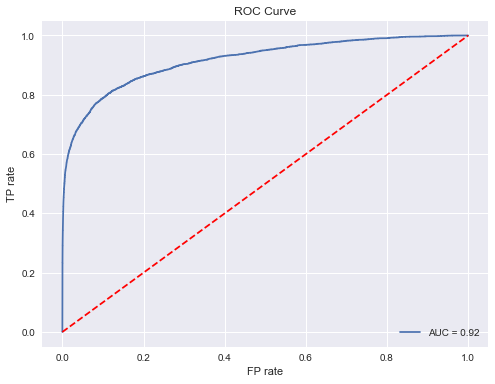

In [101]:
y_pred = model.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(Y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()